# GEO 203: Fundamentals of Solid Earth Science

## Problem Sheet \# 2 Pressure, Plate Motion, and Earthquake Size

*Due 11:59pm Tuesday, September 27 via Gradescope upload (see Canvas link)*

IN THE SPACE BELOW, WRITE OUT IN FULL AND THEN SIGN THE HONOR PLEDGE:

“I pledge my honor that I have not violated the honor code during this examination.”

**PRINT NAME**: ANSWER KEY

By uploading this assignment through Canvas, I sign off on the document below electronically.

----

# Part I: Pressure variations on and within a terrestrial planet

Pressure, force per unit area, plays an important role in making a habitable planet. Atmospheric pressure controls the living condition on the planet's surface while the pressure deep inside the planet dictate which materials at which states exist in the planet. We study pressure on Earth and other planets to understand the dynamic of the planets and find the condition that life may prosper.

## Section A: pressure at the surface

Pressure at the surface mostly comes from the atmosphere layer on top of the rocky planet. The surface pressure dictates whether liquid water can exist on the planet. The variation of the pressure in space and time causes the circulation of air and more importantly, weather.

The air pressure at the Earth’s surface is $1.013 \times 10^5 \text{ N/m}^2$. This pressure supports the weight of the Earth’s
atmosphere. (Weight is the gravitational force: $\text{weight} = m \times g$.)

**Q1** What is the mass of Earth's atmosphere? The radius of the Earth: $6371 \text{ km}$. The gravitational acceleration $g: 9.8 \text{ m/s}^2$. You assume that weight of the Earth's atmosphere acts equally on Earth's surface.

**Answer**

<div style="color:red">
    <u>You may write markdown text to show your calculation:</u>
    <p> </p>
    <p>Weight of the atmosphere is the pressure times the Earth's surface area ($A = 4\pi R^2$):
    \begin{align}
        F =& PA = P(4 \pi R^2) = (1.013 \times 10^5 \text{ N/m}^2) (4\pi\ (6371 \times 10^3 \text{ m})^2) \\
        F =& 5.167 \times 10^{19} \text{ N}
    \end{align}
    Note that $F = mg$. Therefore, the mass of Earth's atmosphere is
    \begin{equation}
        m = \frac{F}{g} = \frac{5.167 \times 10^{19} \text{ N}}{9.8 \text{ m/s}^2} = 5.272 \times 10^{18} \text{ kg}
    \end{equation}
    </p>
    <u>Or just write code with sufficient comments to show your calculation:</u>
    </div>

In [1]:
import numpy as np

P = 1.013e5               # N/m^2    Atmospheric pressure
R = 6371e3                # m        Radius of Earth
g = 9.8                   # m/s^2    Gravitational acceleration on Earth's surface

A = 4 * np.pi * (R ** 2)  # m^2      Earth's surface area
F = P * A                 # kg m/s^2 Weight of the atmosphere

M = F / g                 # kg       Mass of Earth's atmosphere

print("The mass of Earth's atmosphere is", M, "kg.")

The mass of Earth's atmosphere is 5.272401122904239e+18 kg.


**Q2** The planets closest to us, Mars and Venus, are in many ways similar to Earth, but their atmospheres are quite different.

| Planet                       | Venus                   | Mars                    |
| ---------------------------- | ----------------------- | ----------------------- |
| Radius                       | 6052 km                 | 3397 km                 |
| Gravitational acceleration   | 9.1 m/s$^2$             | 3.8 m/s$^2$             |
| Mass of atmosphere           | 4.5 x 10$^{20}$ kg      | 2.2 x 10$^{16}$ kg      |

What is the atmospheric pressure on the surface of Mars and Venus?

**Answer**

<div style="color:red">
    \begin{equation}
        P = \frac{F}{A} = \frac{Mg}{4\pi R^2}
    \end{equation}
    For Venus,
    \begin{equation}
        P = \frac{(4.5 \times 10^{20} \text{ kg}) (9.1 \text{ m/s}^2)}{4\pi (6052 \times 10^3 \text{ m})^2} = 8.897 \times 10^6 \text{ N/m}^2
    \end{equation}
    For Mars,
    \begin{equation}
        P = \frac{(2.2 \times 10^{16} \text{ kg}) (3.8 \text{ m/s}^2)}{4\pi (3397 \times 10^3 \text{ m})^2} = 5.765 \times 10^2 \text{ N/m}^2
    \end{equation}
    </div>

## Section B: pressure inside the rocky interior

While measuring pressure on the surface is easy, measuring deep inside the interior is challenging if possible, because we may not directly access the environment down below. Instead, we determine the pressure from other physical properties including planet's density which can be determined from seismological observations and astronomical observations. 

Dziewonski and Anderson (1980) made the Preliminary Reference Earth Model (PREM) from normal mode observations (mode of the Earth's vibrations), travel time observations for seismic waves and astronomic and geodetic data. PREM contains physical properties such as density, seismic wave velocities, and other elastic properties at specific depths including major boundaries such as Mohorovičić discontinuity and core-mantle bounary.

![PREM](PREM_vp_vs_rho.png)

**Image**: Seismic velocities ($\alpha$ and $\beta$) and density ($\rho$) for the Preliminary Reference Earth Model (PREM).

In this problem set, we will use PREM to calculate the mass of the Earth, gravitational acceleration, and pressure at any given depth. We have demonstrated how to calculate the pressure inside a planet $P(r)$ from the planet's mass density $\rho = \rho(r)$ and the pressure at the planet's surface $P(R)$.

\begin{equation}
P(r) = P(R) + \int_r^R \rho(a) g(a) da
\end{equation}

 The gravitational acceration $g(r)$ inside a planet can be determined using Newton's law of gravitation with mass inside the sphere of radius $r$:

\begin{equation}
g(r) = \frac{GM_{\text{inside}}}{r^2} = \frac{G}{r^2} \int_0^r 4\pi a^2 \rho(a) da
\end{equation}

Note that the density must satisfy the equation

\begin{equation}
M_E = \int_0^R 4\pi r^2 \rho(r) dr
\end{equation}

where $M_E$ is the planet's mass and $R$ is the planet radius. If you wonder about this equation, it is essentially $\text{mass} = \text{density} \times \text{volume}$ integrated over the entire sphere.

In [2]:
import pint
import pandas as pd
import pint_pandas

def read_mineos_cards(file,header = 3, R = None):
    """
    Read a card deck file of physical properties in mineos format
    
    Input Parameters:
    ----------------
    
    file: mineos card file containing columns with various properties
    
    header: number of lines in the header
    
    R: Mean radius of the planet
    """

    # Get the default unit registry e.g. MKS units
    ureg = pint.get_application_registry()
        
    # set default radius as Earth
    if R is None: R = 6371000.0 * ureg.meter

    names=['radius','rho','vpv','vsv','qkappa','qmu','vph','vsh','eta']
    units =['m','kg/m^3','m/s','m/s','dimensionless','dimensionless','m/s','m/s','dimensionless']
    fields=list(zip(names,units))
    #formats=[np.float for ii in range(len(fields))]
    # modelarr = np.genfromtxt(file,dtype=None,comments='#',skip_header=3,names=fields)
    modelarr = pd.read_csv(file,skiprows=header,comment='#',sep='\s+',names=fields)

    # read the units from last header
    modelarr_ = modelarr.pint.quantify(level=-1)
    
    # Get the depths based on subtracting radius from R
    modelarr_['depth'] = R - modelarr_['radius'].pint.to(R.units)
                            
    return modelarr_

In [3]:
PREM = read_mineos_cards('PREM750_CARDS')

PREM

/opt/export/course/geo203/anaconda3/envs/fall2022/lib/python3.9/site-packages/pint_pandas/pint_array.py:648: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(qtys, dtype="object", copy=copy)
/opt/export/course/geo203/anaconda3/envs/fall2022/lib/python3.9/site-packages/pint_pandas/pint_array.py:648: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(qtys, dtype="object", copy=copy)


radius       rho       vpv      vsv   qkappa   qmu       vph      vsh  \
0          0.0  13088.48  11262.21   3667.8   1327.6  84.6  11262.21   3667.8   
1       6824.0  13088.47   11262.2  3667.79   1327.6  84.6   11262.2  3667.79   
2      13648.0  13088.44  11262.18  3667.78   1327.6  84.6  11262.18  3667.78   
3      20472.0  13088.39  11262.14  3667.75   1327.6  84.6  11262.14  3667.75   
4      27296.0  13088.32  11262.09  3667.72   1327.6  84.6  11262.09  3667.72   
..         ...       ...       ...      ...      ...   ...       ...      ...   
745  6369800.0    1020.0    1450.0      0.0  57822.5   0.0    1450.0      0.0   
746  6370100.0    1020.0    1450.0      0.0  57822.5   0.0    1450.0      0.0   
747  6370400.0    1020.0    1450.0      0.0  57822.5   0.0    1450.0      0.0   
748  6370700.0    1020.0    1450.0      0.0  57822.5   0.0    1450.0      0.0   
749  6371000.0    1020.0    1450.0      0.0  57822.5   0.0    1450.0      0.0   

     eta      depth  
0    1.0  6371000.0  
1    1.0  6364176.0  
2    1.0  6357352.0  
3    1.0  6350528.0  
4    1.0  6343704.0  
..   ...        ...  
745  1.0     1200.0  
746  1.0      900.0  
747  1.0      600.0  
748  1.0      300.0  
749  1.0        0.0  

[750 rows x 10 columns]

In [4]:
# grabbing values in 'g/cc' as a pandas series
PREM.rho.pint.to('g/cc')

0      13.088480000000002
1      13.088470000000003
2      13.088440000000004
3      13.088390000000002
4      13.088320000000003
              ...        
745    1.0200000000000002
746    1.0200000000000002
747    1.0200000000000002
748    1.0200000000000002
749    1.0200000000000002
Name: rho, Length: 750, dtype: pint[gram / cubic_centimeter]

In [5]:
# grabbing value in 'g/cc' as a numpy array
PREM.rho.pint.to('g/cc').values.data

array([13.08848, 13.08847, 13.08844, 13.08839, 13.08832, 13.08822,
       13.08811, 13.08798, 13.08783, 13.08766, 13.08746, 13.08725,
       13.08702, 13.08676, 13.08649, 13.0862 , 13.08588, 13.08555,
       13.08519, 13.08482, 13.08442, 13.08401, 13.08357, 13.08311,
       13.08264, 13.08214, 13.08162, 13.08109, 13.08053, 13.07995,
       13.07935, 13.07873, 13.07809, 13.07744, 13.07676, 13.07606,
       13.07534, 13.0746 , 13.07384, 13.07306, 13.07225, 13.07143,
       13.07059, 13.06973, 13.06885, 13.06795, 13.06702, 13.06608,
       13.06512, 13.06413, 13.06313, 13.0621 , 13.06106, 13.06   ,
       13.05891, 13.05781, 13.05668, 13.05553, 13.05437, 13.05318,
       13.05198, 13.05075, 13.0495 , 13.04823, 13.04695, 13.04564,
       13.04431, 13.04296, 13.04159, 13.0402 , 13.03879, 13.03736,
       13.03591, 13.03444, 13.03295, 13.03144, 13.02991, 13.02836,
       13.02679, 13.0252 , 13.02358, 13.02195, 13.0203 , 13.01863,
       13.01693, 13.01522, 13.01349, 13.01173, 13.00996, 13.00

### Mini-tutorial

- **Integration with scipy**

[SciPy](https://docs.scipy.org/doc/scipy/tutorial/general.html) is a collection of mathematical algorithms and convenience functions built on the [NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html) extension of Python. SciPy allows us to optimize functions, find roots of functions, interpolate, and integrate. It also provides mathematical and physical constants

Since PREM provided the density at specific depths, and we do not know the analytical form of density, we will use the trapezoidal rule to integrate.

In this mini-tutorial, we will compute a definite integral of $y = f(x) = 10 - x^2$ from $x=0$ to $x=3$. This integral can be evaluated easily the value by hand:
\begin{equation}
\int_{-3}^3 (10 - x^2) dx = \left(10x - \frac{x^3}{3}\right) \Big|_{x=-3}^{x=3} = 42
\end{equation}

We will use `scipy.integrate.trapezoid` to integrate the function with given (x,y) using Trapezoidal rule.

Focus on the following lines:

`from scipy import integrate`

`integral = integrate.trapezoid(y_trap, x_trap)`

Run the next two cells below and then adjust the slider on the figure. Notice the area approaches 42 when the number of trapezoids increases.

In [6]:
import numpy as np
from scipy import integrate

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

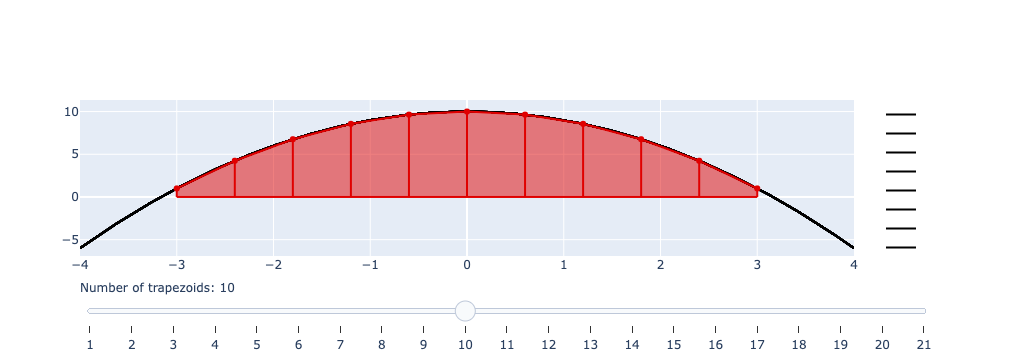

In [7]:
# Create figure
fig = go.Figure()

# actual curve
x_true = np.linspace(-4,4,801)
y_true = 10 - x_true ** 2

num_steps = 21

# True_curve
trace_list1 = []

# Outline of Trapezoids + shades
trace_list2 = []

# divides of Trapezoids
trace_list3 = []

# Add traces, one for each slider step
for number_of_trapezoids in range(1,1+num_steps):
    trace_list1 += [go.Scatter(x=x_true, y=y_true, 
                               visible=True,
                               line=dict(color="#000000", width=2),
                               mode="lines",
                               name=r"$y = 10 - x^2$")]
    
    # integrate y = f(x) from x=0 to x=3
    x_trap = np.linspace(-3,3,number_of_trapezoids+1)
    y_trap = 10 - x_trap ** 2

    # integration takes place here
    integral = integrate.trapezoid(y_trap, x_trap)\

    trace_list2 += [go.Scatter(
            visible=False,
            line=dict(color="#E00000", width=2),
            name=str(number_of_trapezoids) + " trapezoids",
            fill='tozeroy',
            x=x_trap,
            y=y_trap)]
    
    x_plot = x_trap
    y_plot = 0 * y_trap
    
    for jj in range(number_of_trapezoids+1):
        x_plot = np.concatenate((x_plot, [np.nan], [x_trap[jj], x_trap[jj]]))
        y_plot = np.concatenate((y_plot, [np.nan], [0, y_trap[jj]]))
    
    trace_list3 += [go.Scatter(
            visible=False,
            line=dict(color="#E00000", width=2),
            name="area = %.3f"%integral,
            x=x_plot,
            y=y_plot)]
    

fig = go.Figure(data=trace_list1+trace_list2+trace_list3)

# Make 10th trace visible
fig.data[10-1].visible = True
fig.data[10-1+num_steps].visible = True
fig.data[10-1+2*num_steps].visible = True

steps = []
for i in range(num_steps):
    # Hide all traces
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(fig.data)],
        label = str(i + 1)
    )
    # Enable the two traces we want to see
    step['args'][1][i] = True
    step['args'][1][i+num_steps] = True
    step['args'][1][i+2*num_steps] = True
    
    # Add step to step list
    steps.append(step)

sliders = [dict(
    active=9,
    steps = steps,
    currentvalue={"prefix": "Number of trapezoids: "}
)]

fig.layout.sliders = sliders

iplot(fig, show_link=False)

## To do

**Q3** Plot the density profile. Include the location of the inner core boundary (radius = 1221.5 km) and the core-mantle boundary (3480 km). Comment on relative distribution of lighter versus heavier material inside the Earth between the regions-mantle, inner and outer core. Calculate the mass of the Earth by integration. Does the calculated value of the entire Earth's mass match the actual Earth's mass?

**Answer**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

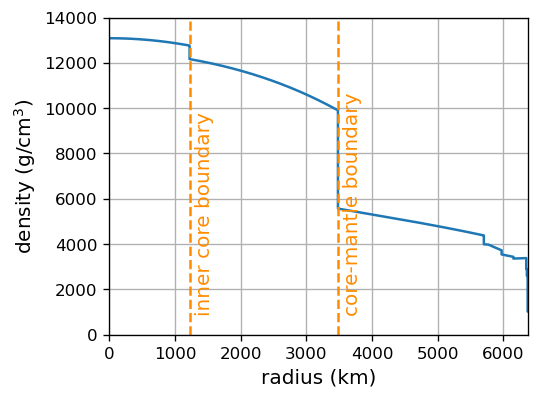

In [9]:
rho = PREM.rho.values.data
r = PREM.radius.values.data

plt.figure(figsize=[4.5,3.5], dpi=120)
plt.plot(r / 1000, rho)
plt.plot([1221.5, 1221.5], [0, 14000], '--', color='darkorange')
plt.text(1300, 1000, 'inner core boundary', size=12, rotation=90, color='darkorange')
plt.plot([3480, 3480], [0, 14000], '--', color='darkorange')
plt.text(3550, 1000, 'core-mantle boundary', size=12, rotation=90, color='darkorange')
plt.xlabel('radius (km)', size=12)
plt.ylabel(r'density (g/cm$^3$)', size=12)
plt.xlim(0,6371)
plt.ylim(0,14000)
plt.grid()
plt.show()

<div style="color:red">
    Heaviest material is concentrated in the inner core surrounded by lighter material in the outer core and even lighter material in the mantle.
    </div>

In [10]:
mass = integrate.trapezoid(4*np.pi*(r**2)*rho, r)

print("The mass of the Earth is %.4g kg."%mass)

The mass of the Earth is 5.973e+24 kg.


<p style="color:red"> The calculated mass matches the actual value of the Earth's mass which is $5.97 \times 10^{24}$ kilograms. </p>

**Q4** Compute the gravitational acceleration at any radii shown in PREM. Where inside the Earth is the gravitational acceleration maximum? Please explain the factors that might lead to this observation.

**Answer**

/tmp/ipykernel_3222996/2292191316.py:10: RuntimeWarning:

divide by zero encountered in double_scalars

/tmp/ipykernel_3222996/2292191316.py:10: RuntimeWarning:

invalid value encountered in double_scalars



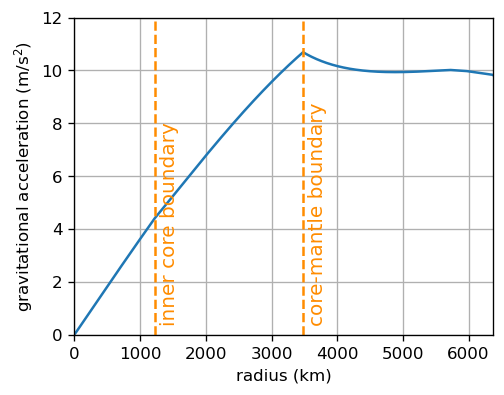

In [11]:
# integrate for gravity
# g(r) = G/r^2 \int_0^r 4\pi a^2 \rho(a) da
G = 6.67408e-11      # m^3 kg^-1 s^-2      Gravitational constant

gravity = np.empty(shape = np.shape(PREM.radius.values.data))
rho = PREM.rho.values.data
r = PREM.radius.values.data

for ii in range(len(gravity)):
    gravity[ii] = G / (r[ii] ** 2) * integrate.trapezoid(4*np.pi*(r[:ii+1]**2)*rho[:ii+1], r[:ii+1])
    
plt.figure(figsize=[4.5,3.5], dpi=120)
plt.plot(r / 1000, gravity)
plt.plot([1221.5, 1221.5], [0, 12], '--', color='darkorange')
plt.text(1300, 0.5, 'inner core boundary', size=12, rotation=90, color='darkorange')
plt.plot([3480, 3480], [0, 12], '--', color='darkorange')
plt.text(3550, 0.5, 'core-mantle boundary', size=12, rotation=90, color='darkorange')
plt.xlabel('radius (km)')
plt.ylabel(r'gravitational acceleration (m/s$^2$)')
plt.xlim(0,6371)
plt.ylim(0,12)
plt.grid()
plt.show()

<div style="color:red">
    <p> The gravitational acceleration is the maximum at the core-mantle boundary. The main factor is the <u>density contrast</u> (or discontinuity) across the core-mantle boundary. Note that the gravitational acceleration does not decrease just outside the inner core boundary where the density contrast is not as significant. </p>
</div>

**Q5** Compute the pressure based on the density profile of PREM. What are the pressures at the core-mantle boundary and the center of the Earth? How do these values compare to the atmospheric pressure on the Earth's surface?

**Answer**

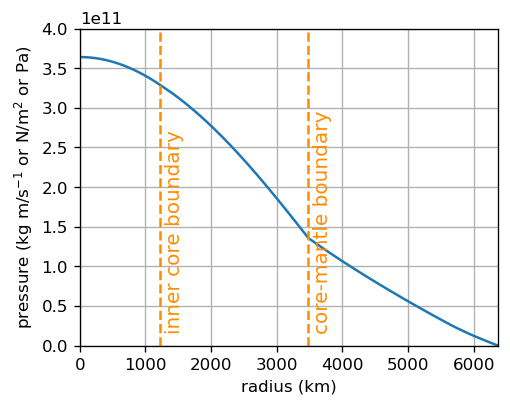

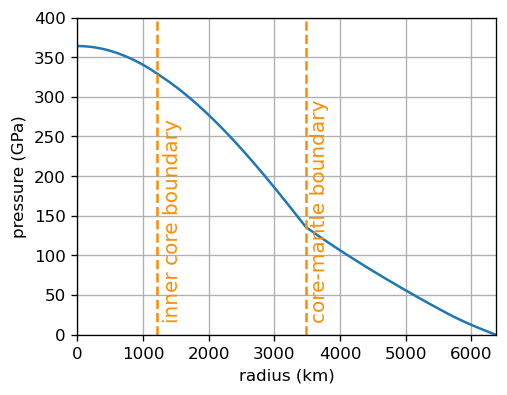

In [12]:
pressure = np.empty(shape = np.shape(PREM.radius.values.data))

for ii in range(len(pressure)):
    pressure[ii] = integrate.trapezoid(gravity[ii:] * rho[ii:], r[ii:])
    
# plot the pressure in SI unit
plt.figure(figsize=[4.5,3.5], dpi=120)
plt.plot(r / 1000, pressure)
plt.plot([1221.5, 1221.5], [0, 4e11], '--', color='darkorange')
plt.text(1300, 0.2e11, 'inner core boundary', size=12, rotation=90, color='darkorange')
plt.plot([3480, 3480], [0, 4e11], '--', color='darkorange')
plt.text(3550, 0.2e11, 'core-mantle boundary', size=12, rotation=90, color='darkorange')
plt.xlabel('radius (km)')
plt.ylabel(r'pressure (kg m/s$^{-1}$ or N/m$^2$ or Pa)')
plt.xlim(0,6371)
plt.ylim(0,4e11)
plt.grid()
plt.show()

# plot the pressure in GPa (gigapascal), commonly used in Geosciences
plt.figure(figsize=[4.5,3.5], dpi=120)
plt.plot(r / 1000, pressure/1e9)
plt.plot([1221.5, 1221.5], [0, 400], '--', color='darkorange')
plt.text(1300, 20, 'inner core boundary', size=12, rotation=90, color='darkorange')
plt.plot([3480, 3480], [0, 400], '--', color='darkorange')
plt.text(3550, 20, 'core-mantle boundary', size=12, rotation=90, color='darkorange')
plt.xlabel('radius (km)')
plt.ylabel('pressure (GPa)')
plt.xlim(0,6371)
plt.ylim(0,400)
plt.grid()
plt.show()

In [13]:
pressure_CMB = pressure[np.argmin(abs(r - 3480000))]
pressure_center = pressure[1]           # pressure[0] yields NaN
pressure_atmosphere = 1.013e5

print('The pressure at the core-mantle boundary is %.4g N/m^2, about %.4g times the atmospheric pressures.'%(pressure_CMB, pressure_CMB / pressure_atmosphere))
print('The pressure at the center of the Earth is %.4g N/m^2, about %.4g times the atmospheric pressures.'%(pressure_center, pressure_center / pressure_atmosphere))

The pressure at the core-mantle boundary is 1.358e+11 N/m^2, about 1.341e+06 times the atmospheric pressures.
The pressure at the center of the Earth is 3.641e+11 N/m^2, about 3.594e+06 times the atmospheric pressures.


----
## Part II: Plate Motion

Below is a sketch that shows the (simplified) geometry of the lithospheric plates near the coast of Oregon and Washington. Three plates are present: the North America plate, the Pacific plate, and the Juan de Fuca plate.

![Three plates](Three_plates.png)

Assume (1) that the spreading of the Juan de Fuca plate and Pacific plate is perpendicular to the
ridge as drawn, and is 40 mm/yr, and (2) that the strike-slip motion between the North America
plate and the Pacific plate is parallel to the North America—Pacific plate boundary and is 56 mm/yr.
The orientation of the ridge is 10$^{\circ}$ East of North. The orientation of the North America—Pacific
plate boundary is 35$^{\circ}$ West of North.

In [14]:
import pandas as pd
import json
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [15]:
def cutoff_track(lon, lat, cutoff_lon):
    """
    Insert nan between two points that cross the cutoff lontitude. 
    Avoid horizontal line when plot the track
    
    Input Parameters:
    ----------------
    
    lon: longitude array
    lat: latitude array
    cutoff_lon: divide the curve at this cutoff longitude
    
    Return:
    ------
    
    lon, lat: updated arrays
    """
    xtrk = np.mod(lon - cutoff_lon, 360)
    is_cross = np.where(np.abs(xtrk[1:-1]-xtrk[0:-2]) > 90)[0]
    nans = np.empty(np.size(is_cross))
    nans[:] = np.nan
    lon = np.insert(lon, is_cross+1, nans)
    lat = np.insert(lat, is_cross+1, nans)
    return lon, lat

def load_plate_boundaries(filename):
    """
    Input Parameters:
    ----------------
    
    filename: input JSON file name containing the curve locations
    """    

    # Opening JSON file
    f = open(filename)

    # returns JSON object as a dictionary
    boundary = json.load(f)
    
    f.close()

    boundary = np.array(boundary[1])
    lons = boundary[:,0]
    lats = boundary[:,1]

    lons, lats = cutoff_track(lons, lats, 180)
    
    return lons, lats

def add_arrow(fig, p0, p1, label_txt="", c="black"):
    """
    Draw an arrow starting from p0 pointing at p1
    
    Input Parameters:
    -----------------
    
    fig:       target figure object
    p0:        [lon, lat] where the arrow starts
    p1:        [lon, lat] where the arrow heads
    label_txt: label text     [default: ""]
    c:         arrow color    [default: "black"]
    """
    # vector of the arrow
    v = p1-p0
    # normalized vector
    w = v/np.linalg.norm(v)
    # orthogonal on v
    u  =np.array([-v[1], v[0]])

    widh = 0.15
    l = 0.75

    P = p1-l*w
    S = P - widh*u
    T = P + widh*u
    fig.add_trace(
        go.Scattergeo(
            lon=[p0[0], p1[0], S[0], np.nan, p1[0], T[0]], 
            lat=[p0[1], p1[1], S[1], np.nan, p1[1], T[1]],
            mode='lines',
            line_color=c,
            line_width=2,
            showlegend=False,
            text=label_txt
        )
    )
    
def add_oval(fig, center, a, b, rot_angle, label_txt="", c="black"):
    """
    Draw an oval
    
    Input Parameters:
    -----------------
    
    fig:       target figure object
    center:    [lon, lat] of the oval's center
    a:         semi-major axis
    b:         semi-minor axis
    rot_angle: rotation angle counter clockwise from horizontal position (in degrees)
    label_txt: label text     [default: ""]
    c:         arrow color    [default: "black"]
    """
    rot_angle = rot_angle * np.pi / 180
    
    theta = np.linspace(0, 2*np.pi, 101)

    x_oval_horizontal = a * np.cos(theta)
    y_oval_horizontal = b * np.sin(theta)

    # rotation
    lon_oval = center[0] + x_oval_horizontal * np.cos(rot_angle) - y_oval_horizontal * np.sin(rot_angle)
    lat_oval = center[1] + x_oval_horizontal * np.sin(rot_angle) + y_oval_horizontal * np.cos(rot_angle)
    
    fig.add_trace(
        go.Scattergeo(
            lon=lon_oval, 
            lat=lat_oval,
            mode='lines',
            line_color=c,
            line_width=4,
            showlegend=False,
            text=label_txt
        )
    )


def plot_earthquake_map(catalog):
    """
    Input Parameters:
    ----------------
    
    catalog: dataframe containing earthquakes
    """   
    
    rlons, rlats = load_plate_boundaries('../PS_1_Age_of_Earth_and_Plate_Tectonics/ridge.json')
    tlons, tlats = load_plate_boundaries('../PS_1_Age_of_Earth_and_Plate_Tectonics/transform.json')
    hlons, hlats = load_plate_boundaries('../PS_1_Age_of_Earth_and_Plate_Tectonics/trench.json')

    fig1a = px.line_geo(lon=rlons, lat=rlats, width=1200, height=600)
    fig1a.update_traces(line={'color':'skyblue', 'width':3})
    
    fig1b = px.line_geo(lon=tlons, lat=tlats, width=1200, height=600)
    fig1b.update_traces(line={'color':'skyblue', 'width':3})
    
    fig1c = px.line_geo(lon=hlons, lat=hlats, width=1200, height=600)
    fig1c.update_traces(line={'color':'skyblue', 'width':3})
    
    fig2 = px.scatter_geo(catalog, lon="ep.lon", lat="ep.lat", size="centroid.MW", color="ep.depth", width=600, height=600, 
                     labels={"ep.lon":"longitude (degrees)", "ep.lat":"latitude (degrees)", "centroid.MW":"Moment Magnitude",
                             "ep.depth":"depth (km)", "ep.timestamp":"origin time"}, 
                     hover_data=['ep.timestamp'], 
                     title=" ")
    
    fig = go.Figure(data=fig2.data + fig1a.data + fig1b.data + fig1c.data, layout = fig2.layout)
    fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
    fig.update_layout(
        geo = dict(
            lonaxis = dict(
                showgrid = True,
                gridwidth = 0.5,
                range= [ -138.0, -118.0 ],
                dtick = 5
            ),
            lataxis = dict (
                showgrid = True,
                gridwidth = 0.5,
                range= [ 37.0, 57.0 ],
                dtick = 5
            )
        )
    )
    
    # Adds arrows
    length_scale = 25
    
    # Juan de Fuca ridge: Juan de Fucca arrow
    p0 = np.array([-129.5, 46.4])
    length = 40 / length_scale
    direction = 100 * np.pi/180
    p1 = p0 + length * np.array([np.sin(direction), np.cos(direction)])
    add_arrow(fig, p0, p1, "40 mm/yr")
    
    # Juan de Fuca ridge: Pacific plate arrow
    p0 = np.array([-130.5, 46.6])
    length = 40 / length_scale
    direction = 280 * np.pi/180
    p1 = p0 + length * np.array([np.sin(direction), np.cos(direction)])
    add_arrow(fig, p0, p1, "40 mm/yr")
    
    # North American plate arrow
    p0 = np.array([-134, 57])
    length = 56 / length_scale
    direction = 145 * np.pi/180
    p1 = p0 + length * np.array([np.sin(direction), np.cos(direction)])
    add_arrow(fig, p0, p1, "56 mm/yr")
    
    # North American plate arrow
    p0 = np.array([-135, 53])
    length = 56 / length_scale
    direction = 325 * np.pi/180
    p1 = p0 + length * np.array([np.sin(direction), np.cos(direction)])
    add_arrow(fig, p0, p1, "56 mm/yr")
    
    # Juan de Fuca ridge: Juan de Fuca plate arrow
    p0 = np.array([-127, 41.4])
    length = 40 / length_scale
    direction = 100 * np.pi/180
    p1 = p0 + length * np.array([np.sin(direction), np.cos(direction)])
    add_arrow(fig, p0, p1, "40 mm/yr", "white")
    
    # Juan de Fuca ridge: Pacific plate arrow
    p0 = np.array([-128, 41.6])
    length = 40 / length_scale
    direction = 280 * np.pi/180
    p1 = p0 + length * np.array([np.sin(direction), np.cos(direction)])
    add_arrow(fig, p0, p1, "40 mm/yr")
    
    # Add oval
    add_oval(fig, [-128.7, 43.7], 2.5, 1.2, -20, "", "limegreen")
    fig.add_annotation(x=.25, y=.40,
            text="???",
            font=dict(
                color="darkgreen",
                size=20
            ),
            showarrow=False)
    
    fig.show()

In [16]:
# Read earthquake catalog
cmt_cat = pd.read_table("../PS_1_Age_of_Earth_and_Plate_Tectonics/Global_CMT_1972_2018.csv", delimiter=',')
cmt_cat = cmt_cat.sort_values(by=['ep.depth', 'centroid.MW'])

/tmp/ipykernel_3222996/2664972690.py:2: DtypeWarning:

Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.



<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title">Review</p>
<p>Feel free to adjust the filter parameters in the cell below to have more or less earthquakes on the map. You may hover the dots to get the information of the earthquakes. The colors of the lines indicate the type of plate boundaries: Red is a Trench, Green is a Transform, and Blue is a Ridge boundary.</p>
    </div>

/tmp/ipykernel_3222996/157848875.py:18: RuntimeWarning:

invalid value encountered in remainder



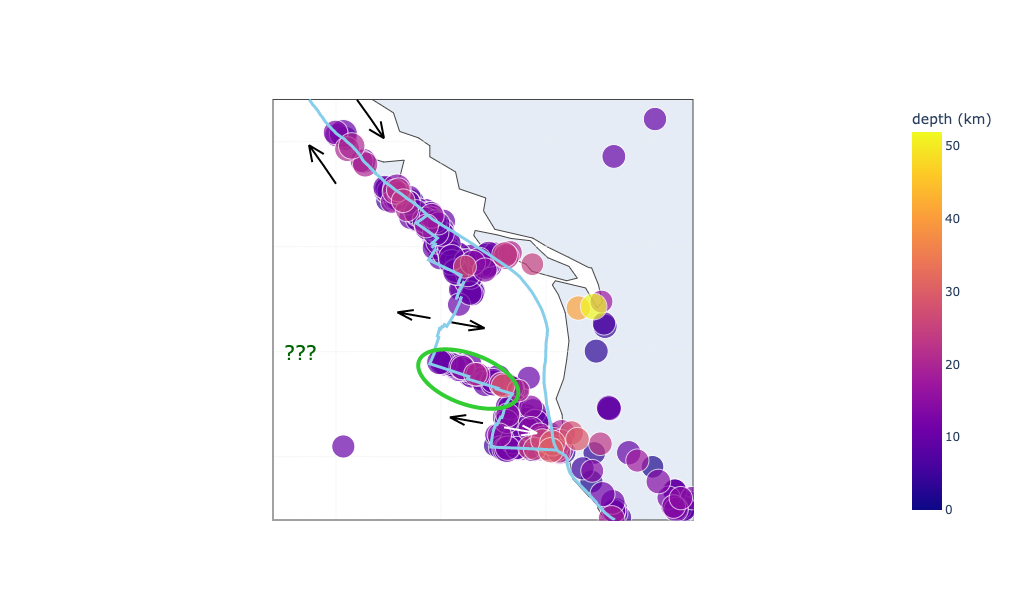

In [17]:
# Filter to improve readablility
Mw_min    = 5                                 # Moment magnitude
Mw_max    = 10                                # Moment magnitude
depth_min = 0                                 # minimum depth in km
depth_max = 6400                              # maximum depth in km
datetime_min = '1000-01-01 00:00:00.000000'   # 'yyyy-mm-dd hh:mm:ss.SSSSSS'
datetime_max = '2050-01-01 00:00:00.000000'   # 'yyyy-mm-dd hh:mm:ss.SSSSSS'
lon_min = -138
lon_max = -118
lat_min = 37
lat_max = 57

# Don't change these two statements
mask = (cmt_cat['centroid.MW'] >= Mw_min) & (cmt_cat['centroid.MW'] <= Mw_max) & (cmt_cat['ep.depth'] >= depth_min) & (cmt_cat['ep.depth'] <= depth_max) & (cmt_cat['ep.timestamp'] >= datetime_min) & (cmt_cat['ep.timestamp'] <= datetime_max)
mask = mask & (cmt_cat['ep.lon'] >= lon_min) & (cmt_cat['ep.lon'] <= lon_max) & (cmt_cat['ep.lat'] >= lat_min) & (cmt_cat['ep.lat'] <= lat_max)
plot_earthquake_map(cmt_cat[mask])

**Image** Remind the color of plate boundary. Why do we have earthquakes here? What are the arrows?

## Mini-tutorial

    - Scalars and Vectors in Python

scalars are quantities having only a magnitude (e.g. a temperature of 300 K). It is nonsense to ask for direction of a scalar. On the other hand, vectors are quantities having a magnitude as well as a direction (e.g. a velocity with a magnitude of 10 m/s and a direction of 30$^{\circ}$ East of North). Vectors can be represent as an array of numbers specifying the quantity for each direction. For example, a velocity with a magnitude of 10 m/s and a direction of 30$^{\circ}$ East of North can be represented as $v = \begin{pmatrix} 5 \\ 5\sqrt{3} \end{pmatrix}$ m/s where the first number is the velocity in the east direction and the second number is the velocity in the north direction. This is similar to "vector" object in programming language. In Python, this means you can use `numpy.array` to represent vectors. The conversion of the magnitude and the (azimuthal) direction to the values in east and north direction can be done as follow:

In [18]:
import numpy as np

In [19]:
magnitude = 10
direction = 30 # in degrees

direction_radian = direction * np.pi / 180   # convert to radians

# vector
v_east  = magnitude * np.sin(direction_radian)
v_north = magnitude * np.cos(direction_radian)
v = np.array([v_east, v_north])

# display a vector
v

array([5.        , 8.66025404])

![one vector example](one-vector.png)

You may add two vectors by adding up element-wise from the two vectors. For `numpy.array`, you may simply add two vectors together like `w = u + v` where `u` and `v` are two vectors.

In [20]:
# vector addition
u = np.array([3, -2])
v = np.array([2,  1])

# the result of vector addition
w = u + v

# display the result vector
w

array([ 5, -1])

![vector addition](vector_addition.png)

## To do

**Q6** What is the motion (the direction with respect to North in degrees, and the magnitude in mm/yr) of the Juan de Fuca plate with respect to the North America plate? Draw an arrow showing this direction on the map. 

**Hint**: Because the Juan de Fuca plate is small, you can consider this a ‘flat Earth’ problem. Also, recall that if three plates interact, and the velocity vector of plate $A$ with respect to plate $B$ is $_B\textbf{V}_A$, and that of plate $B$ with respect to plate $C$ is $_C\textbf{V}_B$, then $_C\textbf{V}_A= _B\textbf{V}_A+ _C\textbf{V}_B$

**Answer**

In [21]:
import numpy as np

def create_vector(magnitude, direction):
    direction_radian = direction * np.pi / 180
    v_east = magnitude * np.sin(direction_radian)
    v_north = magnitude * np.cos(direction_radian)
    v = np.array([v_east, v_north])
    return v

def get_magnitude(v):
    return np.sqrt(np.sum(v ** 2))

def get_direction(v):
    return np.mod(np.arctan2(v[0], v[1]) * 180 / np.pi, 360)

In [22]:
# J -- Juan de Fuca plate
# P -- Pacific plate
# N -- Nort America plate

# NVJ = ???

PVJ = create_vector(40, 80)
NVP = create_vector(56, 325)

NVJ = NVP + PVJ

print("The direction of Juan de Fuca plate with respect to the North America is %.1f degrees with respect to north and the magnitude of %.2f mm/yr."%(get_magnitude(NVJ), get_direction(NVJ)))

The direction of Juan de Fuca plate with respect to the North America is 53.3 degrees with respect to north and the magnitude of 7.84 mm/yr.


**Q7.1** Based on the relative plate motion, what type of plate boundary is this? (Reminder: there are three types of plate boundaries: convergent or collision boundaries, divergent or spreading boundaries, and transform boundaries.)

**Answer**

<p style="color:red"> This is a convergent plate boundaries, because the fault is north-east of the plate which is in the same direction as the heading direction of the plate. </p>

**Q7.2** Based on plate motions, figure out what kind of boundary is denoted by the oval in the interactive figure above. What type of fault (strike-slip, normal, or reverse) is giving rise to these earthquakes?

**Answer**

<p style="color:red"> Transform boundary and strike-slip faults </p>

----
## Part III: Quake Magnitude

Seismologists were for a long time content to use the intensity scale and the magnitude scale to measure and compare the sizes of earthquakes. Both of these scales are empirical, even though determining a magnitude involves making a measurement on a seismogram. Neither measure depends directly on the size of the earthquake fault or the amount of slip that occurred on it. These scales can be contrasted against the seismic moment (or scalar moment), usually denoted by $M_0$. This quantity can be routinely and accurately determined from seismograms. To do so is more complicated than measuring a magnitude, but the advantage of the seismic moment is that it is directly related to physical quantities. The seismic moment is

$$ M_0 =\mu \times A \times u, $$

where $A$ is the area of the fault that slipped, $u$ is the average amount of slip on the fault, and $\mu$ is the shear modulus, which is a property of the rocks surrounding the fault. The shear modulus describes how much force is necessary to elastically bend the rock – a typical value for rocks in the Earth’s crust is $\mu= 3.3 \times 10^{10} \text{N}/\text{m}^2$.

![Moments](Compare_moments.png)

**Image** Comparison of moment, magnitudes, fault area, and fault slip for four earthquakes. The rectangles' sizes indicate the areas of the faults that slip. $M_s$ saturates for events with $M_w > 8$ and so is no longer a useful measurement of earthquake size. (Figure 4.6-3 from Stein and Wysession)

We can calculate the seismic moment of the greatest known earthquake, the 1960 Chile earthquake, by using estimates of the fault dimensions and slip: the length of the fault $L∼1000$ km, the width $W∼200$ km and the total slip $u∼20$ meters: $M_0 = 1000 \times 10^3 \times 200 \times 10^3 \times 20 \times 3 \times 10^{10} = 1.2 \times 10^{23} \text{Nm}$ (newton $\times$ meter). Physically this is not an *energy* but a *moment*, i.e. a force times a length of lever arm.

![histogram MW](histogram_earthquake_MW.png)
![pie chart MW](cumulative_moment_MW.png)
![cumulative moment](cumulative_moment_year.png)

**Take away message**: Most of earthquakes are small, but moment released is dominated by a small number of large earthquakes. 

## To do

**Q8** The seismic moment of the 1994 Northridge (L.A.) earthquake was $2 \times 10^{19}$ Nm. The slip appears to have been 1.3 meters. How big was the fault area that slipped?

**Answer**

<div style="color:red">
\begin{align}
    M_0 =&\ \mu A u \\
    A   =&\ \frac{M_0}{\mu u} \\
    A   =&\ \frac{2 \times 10^{19} \text{ Nm}}{(3.3 \times 10^{10} \text{ N/m}^2) (1.3 \text{ m})} \\
    A   =&\ 4.7 \times 10^{8} \text{ m}^2
\end{align}
    </div>

**Q9** If the 20 meters of slip that occurred in the 1960 Chile earthquake corresponded to the accumulated plate motions between the Nazca and South America plates since the previous great earthquake in this region — when would that earthquake have occurred? [**Useful fact**: Approximately 8 km of the Nazca plate has subducted beneath South America in the last 100,000 years.]

**Answer**

<div style="color:red">
    <p>First, calcualte the average rate of plate motion over 100,000 years:
$$ \text{rate} =\ \frac{\text{distance}}{\text{time}} =\ \frac{8000 \text{ m}}{100000 \text{ years}} =\ 0.08 \text{ m/years} $$ </p>
    <p> </p>
    <p>Then, determine the accumulation time for 20 meters of slip:
$$ \text{time} =\ \frac{\text{distance}}{\text{rate}} =\ \frac{20 \text{ m}}{0.08 \text{ m/years}} =\ 250 \text{ years} $$ </p>
    <p> </p>
    <p> The previous earthquake would occur in 1710. </p>
    </div>

**Q10** When an earthquake happens, the energy stored in the elastically deformed plates is converted into other energy forms, primarily frictional heat and elastic wave energy (most of which turns into heat, too). It turns out that it is very difficult to measure the amount of energy $E$ released in an earthquake accurately but, to within a factor of 5, it appears to be proportional to the seismic moment. A relationship which seems to be on average correct is $E= M_0 \times 5 \times 10^{-5}$. The energy $E$ is measured in newton-meters (Nm) or joules (J)

Estimate the energy released in the 1994 Northridge (L.A.) earthquake. Compare the value you get with U.S. total daily energy consumption ($~5 \times 10^{17}$ J).

**Answer**

<div style="color:red">
    $$ E = M_0 \times 5 \times 10^{-5} = (2 \times 10^{19} \text{ Nm}) \times 5 \times 10^{-5} = 1 \times 10^{15} \text{ J} $$
    <br>
    $$ \frac{E}{E_{\text{US}}} =\ \frac{1 \times 10^{15} \text{ J}}{5 \times 10^{17} \text{ J}} = 2 \times 10^{-3} = 0.2 \% $$
    <br>
    The energy released in the 1994 Northridge (L.A.) earthquake is about 0.2 % of the U.S. total daily energy consumption.
    </div>

**Q11** Instead of getting rid of the magnitude scale, seismologists decided to create a new magnitude based on the seismic moment. This was done so as not to confuse the public (and themselves), to avoid dealing with very large numbers like $10^{20}$, and to be able to compare old magnitude estimates with modern seismic moments, and so on. From the seismic moment (measured in Nm) one can calculate a magnitude $M_W$ called the moment magnitude using the equation

$$ M_W = \frac{2}{3} (\log_{10}M_0 - 9.05) $$

The constants in this equation were chosen so that the new scale coincides with Richter’s traditional magnitude scale. That is, an earthquake that is measured with traditional means to have a Richter magnitude of 6.5 will typically also have a seismic moment that corresponds to a moment magnitude of 6.5. However, for an individual earthquake, it is not uncommon for the the traditional magnitude to be wrong by half a magnitude unit. It is particularly difficult to measure the magnitudes of very large earthquakes using the ‘old-fashioned’ approach.

What is the moment magnitude of the 1960 Chile earthquake?

**Answer**

<div style="color:red">
$$ M_W = \frac{2}{3} (\log_{10}M_0 - 9.05) = \frac{2}{3} (\log_{10}(1.2 \times 10^{23}) - 9.05) = 9.35 $$
    </div>

**Q12** From these relationships, calculate how much more energy is released in a $M_W=7$ than in a $M_W=6$ earthquake.

**Answer**

<div style="color:red">
Starting from
\begin{align}
    M_W =& \frac{2}{3} (\log_{10}M_0 - 9.05) \\
    M_0 =& 10^{1.5M_W + 9.05}
\end{align}
<br>
Then,
$$ E = M_0 \times 5 \times 10^{-5} = 10^{1.5M_W + 9.05} \times 5 \times 10^{-5} $$
<br>
Let $E_6$ and $E_7$ are energies released from a $M_W = 6$ earthquake and $M_W = 7$ earthquake, respectively.
<br>
$$ \frac{E_7}{E_6} = \frac{10^{1.5(7) + 9.05} \times 5 \times 10^{-5}}{10^{1.5(6) + 9.05} \times 5 \times 10^{-5}} = 10^{1.5(7-6)} = 31.6$$
<br>
Therefore, a $M_W = 7$ earthquake releases more energy than a $M_W = 6$ earthquake by 31.6 times.
</div>

**Q13** Why do we tend to have large earthquakes ($M_W > 7.5$) in the subduction zones? Think about the factors that contibute to the scalar moment based on the equations above. 

**Answer**

<div style="color:red">
<p> 1. The brittle lithosphere of the downgoing plate is thicker (old and cold), and extends deeper in subduction zones. </p>
<p> 2. More length of the fault and surface are is available to slip during rupture in subduction zones. </p>
</div>